In [1]:
# Modul Dasar
import numpy as np               # Operasi matematika dan array
import pandas as pd              # Struktur data tabular (DataFrame)
import matplotlib.pyplot as plt  # Visualisasi data
import seaborn as sns            # Visualisasi data tambahan

# Statistik dan Machine Learning
from scipy import stats          # Statistikaa
from sklearn import datasets     # Datasets untuk machine learning
from sklearn.model_selection import train_test_split  # Pembagian data train-test
from sklearn.preprocessing import StandardScaler     # Normalisasi data
from sklearn.linear_model import LinearRegression    # Regresi linear
from sklearn.tree import DecisionTreeClassifier      # Klasifikasi menggunakan Decision Tree
from sklearn.cluster import KMeans                    # KMeans clustering

# Evaluasi Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluasi performa model

# Visualisasi Machine Learning
from sklearn.tree import plot_tree    # Visualisasi struktur Decision Tree
from sklearn.metrics import roc_curve, auc  # Kurva ROC dan AUC


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import tensorflow as tf

# Set seed for numpy
np.random.seed(42)

# Set seed for TensorFlow
tf.random.set_seed(42)


In [3]:
data = pd.read_csv("../data/external/ihsg 14-12-22 till 22-04-24.csv")
# data = pd.read_csv("../data/external/5 tahun.csv")
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-14,6810.355957,6854.098145,6774.131836,6801.749023,6801.749023,215430000
1,2022-12-15,6801.789063,6801.837891,6740.955078,6751.859863,6751.859863,145093400
2,2022-12-16,6751.859863,6812.192871,6693.765137,6812.192871,6812.192871,156126900


In [4]:
lengh_data = len(data)
split_ratio = 0.8
lengh_train = round(lengh_data * split_ratio)
lengh_validation = lengh_data -lengh_train

In [5]:
data = data.drop(["Volume"],axis=1)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index("Date")

#hai widha

In [6]:
def time_series_to_supervised(data, n_in=1, n_out=1, dropnan=True, var_names=None):
    """
    Mengubah data time series menjadi data supervised learning.

    Argumen:
    data: DataFrame, dataset time series yang akan diubah.
    n_in: int, jumlah timestep mundur sebagai input (X).
    n_out: int, jumlah timestep maju sebagai output (y).
    dropnan: bool, apakah akan menghapus baris dengan nilai NaN.
    var_names: list of str, nama variabel untuk setiap kolom.

    Returns:
    DataFrame yang sudah diubah menjadi format supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = [], []
    
    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        if var_names is None:
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        else:
            names += [(var_names[j] + '(t-%d)' % i) for j in range(n_vars)]
    
    # Output sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            if var_names is None:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [(var_names[j] + '(t)') for j in range(n_vars)]
        else:
            if var_names is None:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            else:
                names += [(var_names[j] + '(t+%d)' % i) for j in range(n_vars)]
    
    # Concatenate semua kolom
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # Hapus baris dengan nilai NaN
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

# Contoh penggunaan:
# Misalkan 'data' adalah DataFrame yang berisi data time series
# dengan tiga fitur, dan kita ingin menggunakan 3 timestep mundur sebagai input
# dan 1 timestep maju sebagai output, dan nama variabel untuk setiap fitur adalah
# 'A', 'B', dan 'C'

var_names = data.columns
data_supervised = time_series_to_supervised(data, n_in=15, n_out=1, var_names=var_names)


In [7]:
train_data = data_supervised[:lengh_train]
validation_data = data_supervised[lengh_train:]

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data train
scaled_train_data = scaler.fit_transform(train_data)

# Konversi data yang telah dinormalisasi kembali ke dalam DataFrame
scaled_train_data = pd.DataFrame(scaled_train_data, columns=train_data.columns)



In [9]:
y_train_scaled = scaled_train_data[["Open(t)"]]  # Ambil kolom Open(t) sebagai target
X_train_scaled = scaled_train_data.drop(["Open(t)", "Close(t)", "High(t)", "Low(t)", "Adj Close(t)"], axis=1)

In [10]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open(t-15)       255 non-null    float64
 1   High(t-15)       255 non-null    float64
 2   Low(t-15)        255 non-null    float64
 3   Close(t-15)      255 non-null    float64
 4   Adj Close(t-15)  255 non-null    float64
 5   Open(t-14)       255 non-null    float64
 6   High(t-14)       255 non-null    float64
 7   Low(t-14)        255 non-null    float64
 8   Close(t-14)      255 non-null    float64
 9   Adj Close(t-14)  255 non-null    float64
 10  Open(t-13)       255 non-null    float64
 11  High(t-13)       255 non-null    float64
 12  Low(t-13)        255 non-null    float64
 13  Close(t-13)      255 non-null    float64
 14  Adj Close(t-13)  255 non-null    float64
 15  Open(t-12)       255 non-null    float64
 16  High(t-12)       255 non-null    float64
 17  Low(t-12)       

In [11]:
y_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open(t)  255 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [12]:
# Misalnya, Anda memiliki 3 langkah waktu dan 5 fitur
timesteps = 15
features = 5
X_train = []
for i in range(timesteps):
    X_train.append(X_train_scaled.iloc[:, i*features:(i+1)*features].values)

# Ubah list menjadi array numpy
X_train = np.array(X_train)
X_train = X_train.transpose(1, 0, 2)
# Bentuknya menjadi (jumlah_sampel, timestep, feature)
print(X_train.shape)

(255, 15, 5)


In [13]:
from keras.layers import LSTM
from keras.layers import Bidirectional

model_lstm = Sequential()
model_lstm.add(Bidirectional(LSTM(128, activation='relu',return_sequences=True, input_shape=(X_train.shape[1], 5))))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(128,activation='relu', return_sequences=False))
model_lstm.add(Dense(128))
model_lstm.add(Dense(1))


In [14]:
early_stopping = EarlyStopping(monitor='loss', patience=20, verbose=1, restore_best_weights=True)

model_lstm.compile(optimizer='adam', loss="mse",metrics=["mse"])



In [15]:
# Fit the model with early stopping
hist = model_lstm.fit(X_train, train_data['Open(t)'], 
                      epochs=200, 
                      batch_size=32,
                      callbacks=[early_stopping])

Epoch 1/200
8/8 [==============================] - 6s 42ms/step - loss: 47417692.0000 - mse: 47417692.0000
Epoch 2/200
8/8 [==============================] - 0s 38ms/step - loss: 52591684.0000 - mse: 52591684.0000
Epoch 3/200
8/8 [==============================] - 0s 36ms/step - loss: 43585208.0000 - mse: 43585208.0000
Epoch 4/200
8/8 [==============================] - 0s 35ms/step - loss: 44890284.0000 - mse: 44890284.0000
Epoch 5/200
8/8 [==============================] - 0s 42ms/step - loss: 42053824.0000 - mse: 42053824.0000
Epoch 6/200
8/8 [==============================] - 0s 35ms/step - loss: 44603428.0000 - mse: 44603428.0000
Epoch 7/200
8/8 [==============================] - 0s 38ms/step - loss: 33978400.0000 - mse: 33978400.0000
Epoch 8/200
8/8 [==============================] - 0s 35ms/step - loss: 23825966.0000 - mse: 23825966.0000
Epoch 9/200
8/8 [==============================] - 0s 42ms/step - loss: 12227599.0000 - mse: 12227599.0000
Epoch 10/200
8/8 [===================

In [16]:
y_pred = model_lstm.predict(X_train)

8/8 [==============================] - 1s 10ms/step


In [17]:
y_pred.shape

(255, 1)

In [18]:
y_pred.squeeze()

array([6863.8574, 6895.6567, 6918.4634, 6851.83  , 6851.687 , 6809.145 ,
       6769.579 , 6757.1367, 6749.9385, 6748.4004, 6721.6196, 6736.172 ,
       6702.868 , 6736.5977, 6752.409 , 6766.717 , 6837.624 , 6871.966 ,
       6854.7646, 6863.911 , 6853.337 , 6870.2163, 6891.6406, 6907.958 ,
       6909.831 , 6912.0586, 6905.4004, 6878.75  , 6861.2812, 6874.9126,
       6891.3955, 6880.086 , 6886.2266, 6871.126 , 6873.897 , 6880.458 ,
       6877.7026, 6896.1855, 6894.0312, 6881.449 , 6881.1367, 6905.411 ,
       6852.559 , 6858.5605, 6846.5986, 6817.3076, 6814.29  , 6803.457 ,
       6781.9873, 6791.8945, 6757.881 , 6720.5127, 6711.4277, 6667.22  ,
       6670.299 , 6673.0264, 6671.5166, 6682.419 , 6720.8823, 6748.7803,
       6733.2134, 6758.9453, 6760.579 , 6747.2324, 6764.0127, 6829.28  ,
       6856.463 , 6826.7197, 6839.992 , 6813.0244, 6795.5703, 6818.4604,
       6809.3564, 6786.041 , 6812.214 , 6823.5234, 6838.866 , 6821.1006,
       6852.4434, 6880.137 , 6872.102 , 6832.1064, 

In [19]:
train_data['Open(t)']

Date
2023-01-04    6888.798828
2023-01-05    6813.279785
2023-01-06    6653.759766
2023-01-09    6684.558105
2023-01-10    6688.265137
                 ...     
2024-01-19    7271.341797
2024-01-22    7233.172852
2024-01-23    7232.516113
2024-01-24    7255.770020
2024-01-25    7215.526855
Name: Open(t), Length: 255, dtype: float64

In [20]:
mse = np.mean((y_pred.squeeze() - train_data['Open(t)'])**2)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 6136.171109396845
RMSE: 78.33371630017847


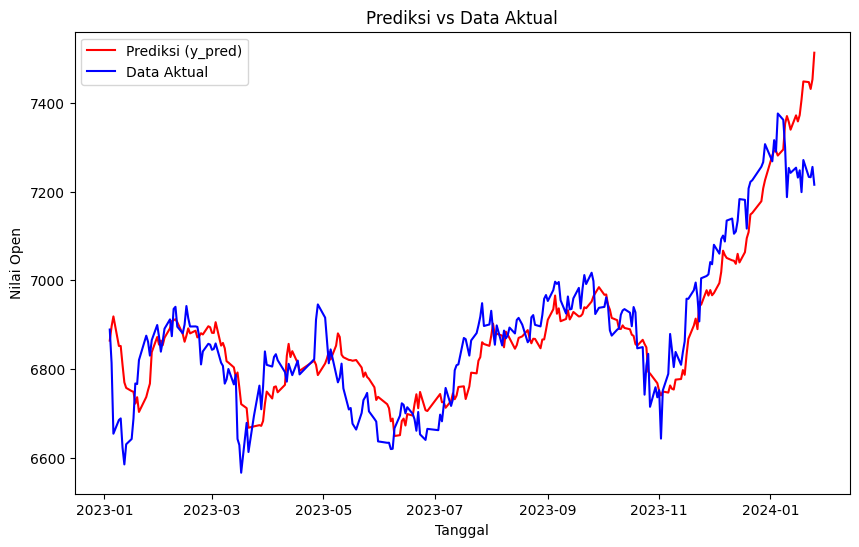

In [21]:
import matplotlib.pyplot as plt

# Plot hasil prediksi (y_pred) dan data aktual (train_data['Open(t)'])
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, y_pred.squeeze(), label='Prediksi (y_pred)', color='red')
plt.plot(train_data.index, train_data['Open(t)'], label='Data Aktual', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Open')
plt.title('Prediksi vs Data Aktual')
plt.legend()
plt.show()


In [22]:
scaled_val_data = scaler.transform(validation_data)

# Konversi data yang telah dinormalisasi kembali ke dalam DataFrame
scaled_val_data = pd.DataFrame(scaled_val_data, columns=validation_data.columns)

In [23]:
scaled_val_data

,Open(t-15),High(t-15),Low(t-15),Close(t-15),Adj Close(t-15),Open(t-14),High(t-14),Low(t-14),Close(t-14),Adj Close(t-14),...,Open(t-1),High(t-1),Low(t-1),Close(t-1),Adj Close(t-1),Open(t),High(t),Low(t),Close(t),Adj Close(t)
0,1.080198,1.043214,1.095188,0.988484,0.988484,0.982430,0.986621,0.906603,0.904050,0.904050,...,0.801666,0.808067,0.783979,0.771142,0.771142,0.723624,0.696602,0.688628,0.719565,0.719565
1,1.061220,1.029257,0.992901,0.904050,0.904050,0.905615,0.882247,0.788987,0.799052,0.799052,...,0.723624,0.696602,0.688628,0.719565,0.719565,0.718006,0.710699,0.708374,0.744862,0.744862
2,0.978243,0.920372,0.864089,0.799052,0.799052,0.767188,0.815599,0.755218,0.833173,0.833173,...,0.718006,0.710699,0.708374,0.744862,0.744862,0.717415,0.756156,0.731372,0.788993,0.788993
3,0.828715,0.850845,0.827106,0.833173,0.833173,0.848460,0.838525,0.838263,0.823938,0.823938,...,0.717415,0.756156,0.731372,0.788993,0.788993,0.798928,0.800124,0.804444,0.808797,0.808797
4,0.916505,0.874761,0.918056,0.823938,0.823938,0.834780,0.831315,0.820679,0.850605,0.850605,...,0.798928,0.800124,0.804444,0.808797,0.808797,0.809470,0.801419,0.803269,0.800932,0.800932
5,0.901728,0.867240,0.898798,0.850605,0.850605,0.849187,0.843341,0.821358,0.829022,0.829022,...,0.809470,0.801419,0.803269,0.800932,0.800932,0.809530,0.788939,0.789234,0.847641,0.847641
6,0.917290,0.879785,0.899541,0.829022,0.829022,0.821544,0.826585,0.825965,0.852681,0.852681,...,0.809530,0.788939,0.789234,0.847641,0.847641,0.828571,0.808539,0.796431,0.797052,0.797052
7,0.887431,0.862305,0.904587,0.852681,0.852681,0.841747,0.806449,0.767111,0.799595,0.799595,...,0.828571,0.808539,0.796431,0.797052,0.797052,0.819706,0.826525,0.828578,0.858501,0.858501
8,0.909253,0.841299,0.840130,0.799595,0.799595,0.781092,0.825178,0.795451,0.865502,0.865502,...,0.819706,0.826525,0.828578,0.858501,0.858501,0.862673,0.848293,0.845054,0.843066,0.843066
9,0.843734,0.860837,0.871168,0.865502,0.865502,0.870526,0.839137,0.777410,0.833305,0.833305,...,0.862673,0.848293,0.845054,0.843066,0.843066,0.866817,0.875228,0.875829,0.921799,0.921799


In [24]:
y_val_scaled = scaled_val_data[["Open(t)"]]  # Ambil kolom Open(t) sebagai target
X_val_scaled = scaled_val_data.drop(["Open(t)", "Close(t)", "High(t)", "Low(t)", "Adj Close(t)"], axis=1)

In [25]:

X_val = []
for i in range(timesteps):
    X_val.append(X_val_scaled.iloc[:, i*features:(i+1)*features].values)

# Ubah list menjadi array numpy
X_val = np.array(X_val)
X_val = X_val.transpose(1, 0, 2)
# Bentuknya menjadi (jumlah_sampel, timestep, feature)
print(X_val.shape)

(49, 15, 5)


In [26]:
y_val_pred = model_lstm.predict(X_val)

2/2 [==============================] - 0s 9ms/step


In [27]:
y_val_pred.squeeze()

array([7566.1724, 7485.9604, 7380.2324, 7300.551 , 7340.6675, 7350.488 ,
       7362.619 , 7363.036 , 7371.7417, 7380.42  , 7413.3955, 7397.6978,
       7405.8896, 7396.2666, 7352.8276, 7305.09  , 7315.2314, 7338.167 ,
       7384.8   , 7402.3857, 7404.0234, 7396.0854, 7413.875 , 7437.635 ,
       7474.636 , 7455.4443, 7575.657 , 7613.4785, 7593.9277, 7665.3906,
       7677.134 , 7663.3857, 7604.8755, 7554.26  , 7564.837 , 7630.3643,
       7640.311 , 7609.6265, 7563.7686, 7538.162 , 7580.7666, 7685.6626,
       7766.8804, 7812.9087, 7751.8027, 7617.1064, 7527.358 , 7533.6323,
       7504.06  ], dtype=float32)

In [28]:
validation_data['Open(t)']

Date
2024-01-26    7152.269043
2024-01-29    7147.714844
2024-01-30    7147.235840
2024-01-31    7213.307129
2024-02-01    7221.852051
2024-02-02    7221.900879
2024-02-05    7237.334961
2024-02-06    7230.148926
2024-02-07    7264.976074
2024-02-12    7268.334961
2024-02-13    7301.587891
2024-02-15    7337.630859
2024-02-16    7337.815918
2024-02-19    7323.312012
2024-02-20    7320.723145
2024-02-21    7345.791016
2024-02-22    7334.952148
2024-02-23    7326.526855
2024-02-26    7277.640137
2024-02-27    7263.987793
2024-02-28    7292.075195
2024-02-29    7326.803223
2024-03-01    7318.666016
2024-03-04    7318.832031
2024-03-05    7296.534180
2024-03-06    7252.084961
2024-03-07    7338.731934
2024-03-08    7398.429199
2024-03-13    7422.301758
2024-03-14    7405.566895
2024-03-15    7408.658203
2024-03-18    7338.076172
2024-03-19    7320.538086
2024-03-20    7303.929199
2024-03-21    7360.558105
2024-03-22    7327.514160
2024-03-25    7339.523926
2024-03-26    7337.661133
2024-03

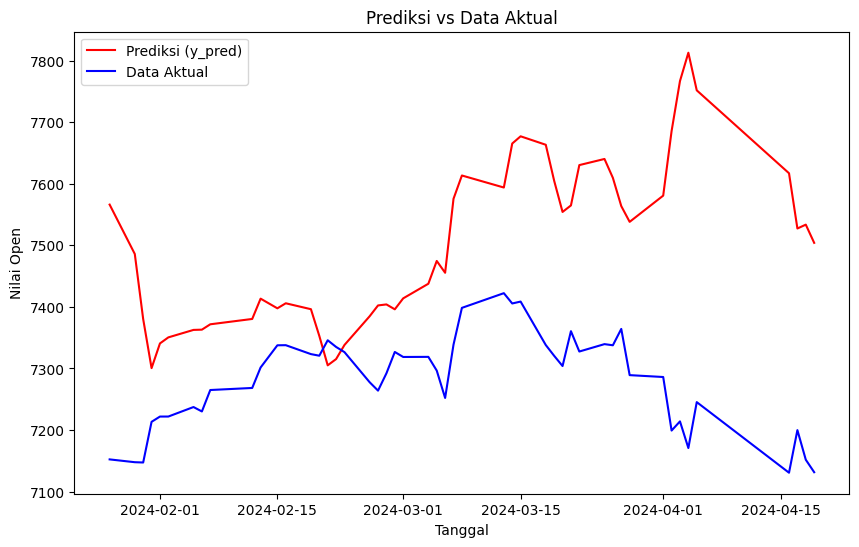

In [29]:
import matplotlib.pyplot as plt

# Plot hasil prediksi (y_pred) dan data aktual (train_data['Open(t)'])
plt.figure(figsize=(10, 6))
plt.plot(validation_data.index, y_val_pred.squeeze(), label='Prediksi (y_pred)', color='red')
plt.plot(validation_data.index, validation_data['Open(t)'], label='Data Aktual', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Open')
plt.title('Prediksi vs Data Aktual')
plt.legend()
plt.show()


In [30]:
mse = np.mean((y_val_pred.squeeze() - validation_data['Open(t)'])**2)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 70536.7287628426
RMSE: 265.58751620293185


# Return

In [133]:
data['Return'] = data['Close'].pct_change()
data = data.dropna()  # Menghapus NaN hasil dari perhitungan pct_change


In [144]:
data.columns[5]

'Return'

In [145]:
def time_series_to_supervised(data, n_in=1, n_out=1, dropnan=True, var_names=None):
    """
    Mengubah data time series menjadi data supervised learning.

    Argumen:
    data: DataFrame atau Series, dataset time series yang akan diubah.
    n_in: int, jumlah timestep mundur sebagai input (X).
    n_out: int, jumlah timestep maju sebagai output (y).
    dropnan: bool, apakah akan menghapus baris dengan nilai NaN.
    var_names: list of str, nama variabel untuk setiap kolom.

    Returns:
    DataFrame yang sudah diubah menjadi format supervised learning.
    """
    if isinstance(data, pd.Series):
        data = data.to_frame()
        
    n_vars = data.shape[1]
    df = pd.DataFrame(data)
    cols, names = [], []
    
    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        if var_names is None:
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        else:
            names += [(var_names[j] + '(t-%d)' % i) for j in range(n_vars)]
    
    # Output sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            if var_names is None:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [(var_names[j] + '(t)') for j in range(n_vars)]
        else:
            if var_names is None:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            else:
                names += [(var_names[j] + '(t+%d)' % i) for j in range(n_vars)]
    
    # Concatenate semua kolom
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # Hapus baris dengan nilai NaN
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg


In [146]:
data_supervised_return = time_series_to_supervised(data['Return'], n_in=5, n_out=1, var_names=['Return'])


In [149]:
train_data_return = data_supervised_return[:lengh_train]
validation_data_return = data_supervised_return[lengh_train:]


In [150]:
scaled_train_data_return = scaler.fit_transform(train_data_return)
scaled_train_data_return = pd.DataFrame(scaled_train_data_return, columns=train_data_return.columns)
print(scaled_train_data_return.columns)


Index(['Return(t-5)', 'Return(t-4)', 'Return(t-3)', 'Return(t-2)',
       'Return(t-1)', 'Return(t)'],
      dtype='object')


In [151]:
scaled_train_data_return = scaler.fit_transform(train_data_return)
scaled_train_data_return = pd.DataFrame(scaled_train_data_return, columns=train_data_return.columns)

y_train_return_scaled = scaled_train_data_return[["Return(t)"]]
X_train_return_scaled = scaled_train_data_return.drop(["Return(t)"], axis=1)


In [152]:
timesteps =5
features = 1
X_train = []
for i in range(timesteps):
    X_train.append(X_train_return_scaled.iloc[:, i*features:(i+1)*features].values)

X_train = np.array(X_train).transpose(1, 0, 2)
print(X_train.shape)  # Output seharusnya berbentuk (jumlah_sampel, timestep, features)


(255, 5, 1)


In [153]:
model_lstm = Sequential()

# Adding layers
model_lstm.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(64, activation='relu', return_sequences=False))
model_lstm.add(Dense(64))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='loss', patience=20, verbose=1, restore_best_weights=True)

# Fit the model
hist = model_lstm.fit(X_train, train_data_return['Return(t)'], 
                      epochs=200, 
                      batch_size=32,
                      callbacks=[early_stopping])

# Make predictions
y_pred = model_lstm.predict(X_train)



Epoch 1/200
8/8 [==============================] - 6s 9ms/step - loss: 2.9349e-04 - mse: 2.9349e-04
Epoch 2/200
8/8 [==============================] - 0s 15ms/step - loss: 1.1305e-04 - mse: 1.1305e-04
Epoch 3/200
8/8 [==============================] - 0s 10ms/step - loss: 6.8424e-05 - mse: 6.8424e-05
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 5.0882e-05 - mse: 5.0882e-05
Epoch 5/200
8/8 [==============================] - 0s 7ms/step - loss: 4.4575e-05 - mse: 4.4575e-05
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 4.2782e-05 - mse: 4.2782e-05
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 3.9735e-05 - mse: 3.9735e-05
Epoch 8/200
8/8 [==============================] - 0s 8ms/step - loss: 3.9514e-05 - mse: 3.9514e-05
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 4.0431e-05 - mse: 4.0431e-05
Epoch 10/200
8/8 [==============================] - 0s 7ms/step - loss: 3.9627e-05 - mse: 3.9627e-

In [154]:
# Calculate MSE and RMSE
mse = np.mean((y_pred.squeeze() - train_data_return['Return(t)'].values.squeeze())**2)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)



MSE: 4.020205125247256e-05
RMSE: 0.0063405087534418375


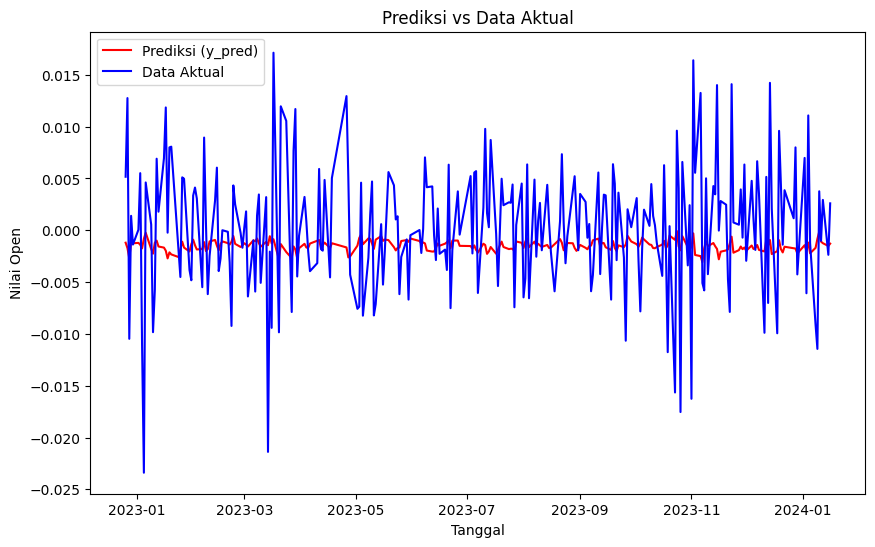

In [155]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_data_return.index, y_pred.squeeze(), label='Prediksi (y_pred)', color='red')
plt.plot(train_data_return.index, train_data_return['Return(t)'], label='Data Aktual', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Open')
plt.title('Prediksi vs Data Aktual')
plt.legend()
plt.show()